- Demostración del código creado para emular una cadena de bloques.

In [1]:
%load_ext autoreload
%autoreload 2
import functions as f
from blockchain import Blockchain

Para crear un blockchain se debe crear una instancia de la clase Blockchain.

Al crear una instancia de una cadena de bloques, se debe determinar la cantidad máxima de transacciones por bloque, donde se tiene en cuenta a cada envio de fees y al pago al minero como transacciones.

También se asigna un número natural "pow_difficulty", que indica la cantidad de ceros iniciales que debe tener el hash del bloque para completar la prueba de trabajo (PoW).

In [2]:
bc = Blockchain(max_transactions_per_block = 5, pow_difficulty = 3)

Al inicializar la instancia, se mina el bloque cero y se crea una única cuenta llamada "miner" al que se le asigna cash luego de cada PoW.

Mostramos las wallets existentes con el cash que tiene cada una, teniendo en cuenta solamente los bloques minados (tomamos solo los minados porque son los que han tenido aval mediante PoW).

In [3]:
bc.wallets_taking_only_mined_blocks()

{'miner': 100.0}


Luego de realizar PoW, se crea automáticamente un nuevo bloque, listo para recibir transacciones.

En el segundo bloque se le asigna menos cash al minero. A medida que el número de bloque es más largo, se le entrega menos premio al minero, eventualmente llegando a 0 si el número de bloque es lo suficientemente grande.

Mostramos la funcion diseñada para entregar un premio decreciente al minero en función del número de bloque. El output de la función dada se redondea a 3 decimales, y por lo tanto, existe un número de bloque a partir del cual no se entrega premio al minero.

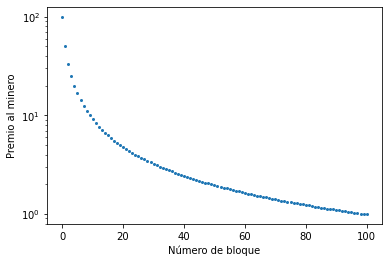

In [4]:
import matplotlib.pyplot as plt
plt.yscale("log")
plt.ylabel("Premio al minero")
plt.xlabel("Número de bloque")
block_numbers = [i for i in range(101)]
plt.plot(block_numbers, [round(100/(block_number+1),3) for block_number in block_numbers],"o", markersize = 2);

Con "bc.show()" se muestra todos los bloques, incluso el no minado (el último).

In [5]:
bc.show()


block  0

header:
nonce  :  16695
block_number  :  0
merkle_tree_root_hash  :  c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841
timestamp  :  1655863770843

body:
transactions  :  (('miner', 100.0),)
merkle_tree  :  Node('/c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841')
wallets_after_block_transactions  :  {'miner': 100.0}

 ----------------------------------------------------------------------------------------------------

block  1

header:
nonce  :  0
prev_hash  :  0000dd0b452191d941c4a5f93ddc4052b90e3785f07944c97e65de10485fda0f
block_number  :  1

body:
transactions  :  (('miner', 50.0),)

 ----------------------------------------------------------------------------------------------------


Agregamos dos cuentas. Al inicializarlas, ambas tienen cash = 0. 

Solo se puede crear cash a través del minado.

In [6]:
bc.add_account("Alice")
bc.add_account("Bob")

Agregamos transacciones al bloque no minado.

Las transacciones se realizan con una tupla de la forma (payer, payee, amount_to_transfer, fee).

En el diseño realizado, el fee se determina al momento de realizar la transacción.

En este caso el único que tiene cash es el minero, entonces es él el que envía. También se paga fees a si mismo en este caso.

In [7]:
bc.add_transaction(("miner","Alice",10,1))

Current block transactions =  3 . Max allowed =  5


Intentamos que la cuenta "miner" de más cash del que tiene a "Alice":

In [8]:
bc.add_transaction(("miner","Alice",1000,1))

AssertionError: 

En la transacción anterior, el minero le dio cash a Alice, entonces se puede agregar una transacción en el mismo bloque con un envío de Alice hacia otro usuario:

In [9]:
bc.add_transaction(("Alice","Bob",5,1))

Current block transactions =  5 . Max allowed =  5


Si se intenta agregar más transacciones de lo permitido, se devuelve un error:

In [10]:
bc.add_transaction(("miner","Bob",20,1))

ValueError: The block is full. Mine it to add a transaction in a new block. 

In [11]:
bc.show()


block  0

header:
nonce  :  16695
block_number  :  0
merkle_tree_root_hash  :  c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841
timestamp  :  1655863770843

body:
transactions  :  (('miner', 100.0),)
merkle_tree  :  Node('/c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841')
wallets_after_block_transactions  :  {'miner': 100.0}

 ----------------------------------------------------------------------------------------------------

block  1

header:
nonce  :  0
prev_hash  :  0000dd0b452191d941c4a5f93ddc4052b90e3785f07944c97e65de10485fda0f
block_number  :  1

body:
transactions  :  (('miner', 50.0), ('miner', 'Alice', 10), ('miner', 'miner', 1), ('Alice', 'Bob', 5), ('Alice', 'miner', 1))

 ----------------------------------------------------------------------------------------------------


Minamos el último bloque. Si se desea también se puede minarlo cuando no tiene el número máximo de transacciones.

In [12]:
bc.mine_last_block()

In [13]:
bc.show()


block  0

header:
nonce  :  16695
block_number  :  0
merkle_tree_root_hash  :  c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841
timestamp  :  1655863770843

body:
transactions  :  (('miner', 100.0),)
merkle_tree  :  Node('/c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841')
wallets_after_block_transactions  :  {'miner': 100.0}

 ----------------------------------------------------------------------------------------------------

block  1

header:
nonce  :  7966
prev_hash  :  0000dd0b452191d941c4a5f93ddc4052b90e3785f07944c97e65de10485fda0f
block_number  :  1
merkle_tree_root_hash  :  0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1
timestamp  :  1655863787560

body:
transactions  :  (('miner', 50.0), ('miner', 'Alice', 10), ('miner', 'miner', 1), ('Alice', 'Bob', 5), ('Alice', 'miner', 1))
merkle_tree  :  Node('/0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1')
wallets_after_block_transactions  :  {'miner': 141.0, 'Alice':

Mostramos el estado de las cuentas tomando solamente transacciones de bloques minados:

In [15]:
bc.wallets_taking_only_mined_blocks()

{'miner': 141.0, 'Alice': 4, 'Bob': 5}


Visualizamos como quedó el Merkle Tree del último bloque minado

In [16]:
# el valor -2 de entrada corresponde al penúltimo bloque (contando incluso al bloque no minado).
bc.visualize_merkle_tree(number_block = -2) 

0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1
├── 45ec05d1f448ba5241da2402bfcd9b15f47994a45e36ad00f66550297fe2fe6e
│   └── d6fce19356c28302e073cfd0214f5e19010224d476360e693f651dfdac976dbb
│       └── bb0ee4d3786b6a31864a3dfb1d50a8f2c2f70cadd12c013a80f75c85ee8e28e7
│           └── ('miner', 50.0)
└── b5d5062ea527c44157df087935fa66e727015dacde2e4d451cf3252be4268111
    ├── c65c087034fb725599502e1c773e14cddc7c3cc73b7d82c38016ed18e2e15e1b
    │   ├── b4aabe4d189f69d4ce43528d2db383d0d95edca87fe71c05174a9abfdbcf9333
    │   │   └── ('miner', 'Alice', 10)
    │   └── 19be4cfe23fb44f0bb679d993561ff582d010775a264d53a59bdf0c42eec785d
    │       └── ('miner', 'miner', 1)
    └── 5fedca3619300f47dbd7e11622121d248936f4def2534ae6172036bc972283c7
        ├── e49c742a51b58215a3597492e160cce2df79f29443ab317628f28b2afe49c943
        │   └── ('Alice', 'Bob', 5)
        └── cd4dddb88b4513a320c3022c8fd7e4a6897e2b66c32df917762fe936fa2b98de
            └── ('Alice', 'miner', 1)


Podemos acceder a la cadena utilizando el comando "bc.chain". La cadena está dada como una tupla, donde en cada entrada se tiene un diccionario que corresponde a un bloque. La primer entrada corresponde al bloque génesis o número 0, la segunda corresponde al bloque número 1 y así sucesivamente.

In [17]:
bc.chain

({'header': {'nonce': 16695,
   'block_number': 0,
   'merkle_tree_root_hash': 'c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841',
   'timestamp': 1655863770843},
  'body': {'transactions': (('miner', 100.0),),
   'merkle_tree': Node('/c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841'),
   'wallets_after_block_transactions': {'miner': 100.0}}},
 {'header': {'nonce': 7966,
   'prev_hash': '0000dd0b452191d941c4a5f93ddc4052b90e3785f07944c97e65de10485fda0f',
   'block_number': 1,
   'merkle_tree_root_hash': '0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1',
   'timestamp': 1655863787560},
  'body': {'transactions': (('miner', 50.0),
    ('miner', 'Alice', 10),
    ('miner', 'miner', 1),
    ('Alice', 'Bob', 5),
    ('Alice', 'miner', 1)),
   'merkle_tree': Node('/0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1'),
   'wallets_after_block_transactions': {'miner': 141.0,
    'Alice': 4,
    'Bob': 5}}},
 {'header': {'nonce': 0,

In [18]:
# bloque génesis
bc.chain[0]

{'header': {'nonce': 16695,
  'block_number': 0,
  'merkle_tree_root_hash': 'c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841',
  'timestamp': 1655863770843},
 'body': {'transactions': (('miner', 100.0),),
  'merkle_tree': Node('/c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841'),
  'wallets_after_block_transactions': {'miner': 100.0}}}

In [19]:
# bloque número 1
bc.chain[1]

{'header': {'nonce': 7966,
  'prev_hash': '0000dd0b452191d941c4a5f93ddc4052b90e3785f07944c97e65de10485fda0f',
  'block_number': 1,
  'merkle_tree_root_hash': '0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1',
  'timestamp': 1655863787560},
 'body': {'transactions': (('miner', 50.0),
   ('miner', 'Alice', 10),
   ('miner', 'miner', 1),
   ('Alice', 'Bob', 5),
   ('Alice', 'miner', 1)),
  'merkle_tree': Node('/0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1'),
  'wallets_after_block_transactions': {'miner': 141.0, 'Alice': 4, 'Bob': 5}}}

Veamos si el hash del head del último bloque minado es el hash guardado en el bloque siguiente:

In [20]:
idx = -2
hash_header_block = f.string_to_hash(str((bc.chain[idx]["header"])))
hash_saved = bc.chain[idx+1]["header"]["prev_hash"]

print(f"{hash_header_block}\n{hash_saved}")
print(hash_header_block == hash_saved)

0005f3e7571428594ed2cc0d6a08ec6833839b3f4aef2fbf242243e411f9fa72
0005f3e7571428594ed2cc0d6a08ec6833839b3f4aef2fbf242243e411f9fa72
True


Veamos el estado de las cuentas y minemos un bloque realizando un único envío de dinero.

In [21]:
bc.wallets_taking_only_mined_blocks()

{'miner': 141.0, 'Alice': 4, 'Bob': 5}


Realizamos un envio de dinero de Bob a si mismo.

In [22]:
bc.add_transaction(("Bob","Bob",2,1)) # Bob termina perdiendo 1 de cash porque paga un fee de 1 al minero.

Current block transactions =  3 . Max allowed =  5


In [23]:
bc.mine_last_block()

In [24]:
bc.show()


block  0

header:
nonce  :  16695
block_number  :  0
merkle_tree_root_hash  :  c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841
timestamp  :  1655863770843

body:
transactions  :  (('miner', 100.0),)
merkle_tree  :  Node('/c46ca60643d459f7b73c9bf6fde6ae366f8671bb10e4f3228e8edb77df3f7841')
wallets_after_block_transactions  :  {'miner': 100.0}

 ----------------------------------------------------------------------------------------------------

block  1

header:
nonce  :  7966
prev_hash  :  0000dd0b452191d941c4a5f93ddc4052b90e3785f07944c97e65de10485fda0f
block_number  :  1
merkle_tree_root_hash  :  0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1
timestamp  :  1655863787560

body:
transactions  :  (('miner', 50.0), ('miner', 'Alice', 10), ('miner', 'miner', 1), ('Alice', 'Bob', 5), ('Alice', 'miner', 1))
merkle_tree  :  Node('/0050379c95251cf5ea04f188a51f2950b1bddbd7b1a65dd5b942fe1262430eb1')
wallets_after_block_transactions  :  {'miner': 141.0, 'Alice':

Veamos el Merkle Tree del último bloque minado:

In [25]:
bc.visualize_merkle_tree(number_block = -2)

47b4841b207a4c1448348eae42228d17bc3dd8dcf15bfbbedc88255567887cc3
├── 7921d5246cf35f6bc33376028ea662626a950852573043e674f1744a023ba079
│   └── 24ea2234316139760800fc01a2a7e33752238d28c981627aa516e1c7d6cdfc34
│       └── ('miner', 33.333)
└── a9008de30b09b893f21d2a391f47bd90767de3629c1bc83cf8a913a35c8281f9
    ├── 02afb1d376e8fe98e01d77a759c261e41051e5105eeab75aebbcceb0c1a002a0
    │   └── ('Bob', 'Bob', 2)
    └── e14b314e03bfd95c26374ac8a3837b39322c26e68ab1e72a2157506aabf6acd2
        └── ('Bob', 'miner', 1)


In [26]:
bc.wallets_taking_only_mined_blocks()

{'miner': 175.333, 'Alice': 4, 'Bob': 4}


Si queremos chequear si un bloque dado es mas nuevo que otro, podemos utilizar la siguiente función:

In [27]:
print(f.block_newer_than(bc.chain[-2],bc.chain[-3]))
print(f.block_newer_than(bc.chain[-4],bc.chain[-2]))

True
False


Si intentamos realizar una transaccion usando una cuenta inexistente, obtenemos un error:

In [28]:
#error para wallet inexistente
bc.add_transaction(("Alice1","Bob",5,1))

KeyError: 'Alice1'